In [1]:
import random
from time import perf_counter
import datetime
import retroactive_queue
import matplotlib.pyplot as plt

n_values = 1000000 # number of values to insert in the queue

batchs = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000] # batch sizes to test

n_iterations = 6 # number of iterations to average the results, 4 is the most common value

In [2]:
# NOT the best way to generate random datetime objects, but we aren't measuring this, this is just random test data
n_values = batchs[-1]

def generate_random_test_data(n_elements):
    list_datetime = [0]*n_elements
    list_string = [0]*n_elements
    # generate n random datetime objects

    for i in range(n_elements):
        year = 2020 # random.randint(2000, 2020)
        month = random.randint(1, 12)
        day = random.randint(1, 28)
        hour = random.randint(0, 23)
        minute = random.randint(0, 59)
        second = random.randint(0, 59)
        microsecond = random.randint(0, 999999)

        list_datetime[i] = datetime.datetime(year, month, day, hour, minute, second, microsecond)
    
    # generate n random strings
    for i in range(n_elements):
        list_string[i] = random.randint(0, n_values)
    
    # merge so [time, value]
    for i in range(n_elements):
        list_datetime[i] = [list_datetime[i], list_string[i]]

    return list_datetime

mother_list = generate_random_test_data(n_values)

for i in range(1, 10):
    print(mother_list[random.randint(0, n_values)])


[datetime.datetime(2020, 7, 25, 8, 20, 13, 719761), 3855]
[datetime.datetime(2020, 10, 10, 16, 41, 1, 6648), 2187]
[datetime.datetime(2020, 7, 25, 4, 51, 43, 50081), 2554]
[datetime.datetime(2020, 4, 7, 14, 42, 55, 658023), 768]
[datetime.datetime(2020, 6, 22, 12, 51, 31, 642116), 919]
[datetime.datetime(2020, 4, 12, 3, 19, 44, 217971), 915]
[datetime.datetime(2020, 4, 18, 23, 28, 30, 809404), 3817]
[datetime.datetime(2020, 1, 17, 21, 33, 53, 532203), 2465]
[datetime.datetime(2020, 2, 28, 1, 0, 52, 116905), 271]


In [3]:
def push_performance(batch_size):
    
    start = perf_counter()

    # push(random datetime, any value)
    for i in range(n_iterations): 
        queue = retroactive_queue.queue(datetime.datetime(2023, 1, 1, 12, 0, 0), "a")
        
        # push n elements
        for j in range(batch_size):
            queue.push(mother_list[j][0], mother_list[j][1])
        
        # reset queue
        queue = None
    
    end = perf_counter()
    
    return (end - start) / n_iterations

def pop_performance(batch_size):
    
    start = perf_counter()
    aux = 0

    # push(random datetime, any value)
    for i in range(n_iterations): 
        queue = retroactive_queue.queue(datetime.datetime(2023, 1, 1, 12, 0, 0), "a")
        
        # push n elements to pop later, don't measure this time
        aux1 = perf_counter()
        for j in range(batch_size):
            queue.push(mother_list[j][0], mother_list[j][1])
        aux2 = perf_counter()
        aux += aux2 - aux1 # time to push n elements, discard this time

        # pop n elements
        for j in range(batch_size):
            queue.pop(mother_list[-j][0])
        
        # reset queue
        queue = None
    
    end = perf_counter()
    
    return (end - start) / n_iterations

In [4]:
def evaluate_performance():
    push_results = []
    pop_results = []

    for batch in batchs:
        push_time = push_performance(batch)
        pop_time = pop_performance(batch)
        
        push_results.append(push_time)
        pop_results.append(pop_time)
        
        print(f"Batch size: {batch}")
        
    return push_results, pop_results

In [5]:
push_results, pop_results = evaluate_performance()

Batch size: 500
Batch size: 1000
Batch size: 1500
Batch size: 2000
Batch size: 2500
Batch size: 3000
Batch size: 3500
Batch size: 4000


looks like time for pop isn't as good as I thought, definitely has something to do with the inorder traversal search of the tree

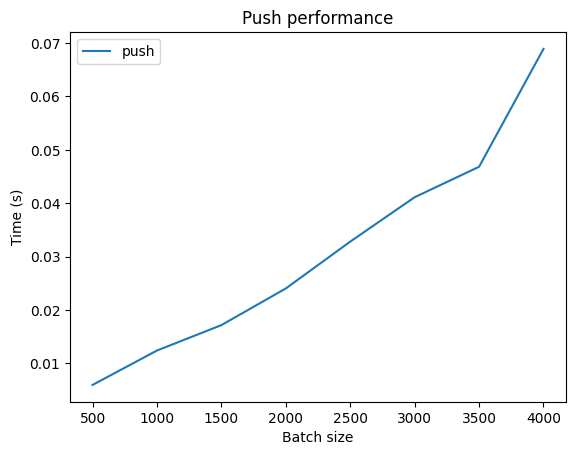

In [6]:
# plot push_results, pop_results

plt.plot(batchs, push_results, label="push")
plt.xlabel("Batch size")
plt.ylabel("Time (s)")
plt.title("Push performance")
plt.legend()
plt.show()

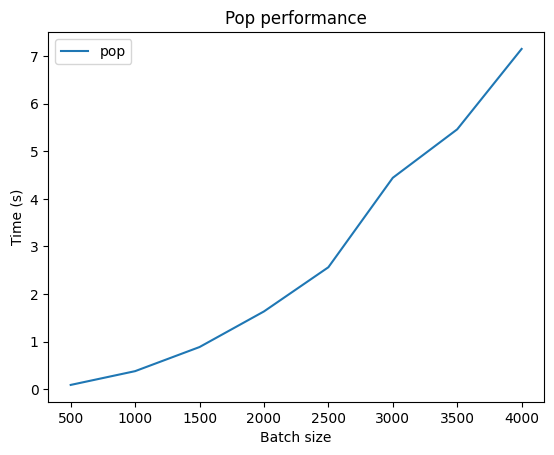

In [7]:
plt.plot(batchs, pop_results, label="pop")
plt.xlabel("Batch size")
plt.ylabel("Time (s)")
plt.title("Pop performance")
plt.legend()
plt.show()